# System of $\phi$ (inflaton) plus Radiation
We have derived the following formulas, which we have summarized below:

Energy density and pressure of inflaton $\phi$ are
$$\rho_\phi=\frac{1}{2}\dot\phi^2+V=\frac{H^2}{2}\phi'^2+V\qquad p_\phi=\frac{1}{2}\dot\phi^2-V=\frac{H^2}{2}\phi'^2-V\,.$$
Equation of motion is
$$\ddot \phi+(3H+\Gamma)\dot\phi+V=0\qquad \phi''=-(3+\frac{H'}{H}+\frac{\Gamma}{H})\phi'-\frac{V_\phi}{H^2}\,.$$
Friedman equations are
$$H^2=\frac{\rho}{3M_{\rm P}^2}\qquad H'=-\frac{\rho+p}{2HM_{\rm P}^2}$$
where $\rho$ and $p$ are total background energy density and pressure.


$$\phi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma}{H})\phi'-\frac{V_\phi}{H^2}\,.$$
$$\rho'_\phi=-3H^2\phi'^2-H\Gamma\phi'^2$$
$$\rho'_r=-4\rho_\gamma+H\Gamma_r\phi'^2$$
<!-- $$\rho'_m=-3\rho_m+H\Gamma_m\phi'^2$$ -->
$$H'=-\frac{\rho+p}{2M^2_\rm P H}$$
where $$\rho+p=\frac{4}{3}\rho_r+H^2\phi'^2$$

In [53]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
m_p=1
m = 1e-6*m_p
def Vp(phi):
    return 0.5*m**2*phi**2
def V_phi(phi):
    return m**2*phi
# defination above should be changed for different models

phi=15
Hi=(2*Vp(phi)/ 6)**0.5
rho_phii=Vp(phi)
rho_ri=0
phii=15
phi_Ni=0
Gamma=1e-8
Gamma_r=1e-8

def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,phi_N,rho_phi,rho_r,H = var
    dphidN=phi_N
    dphi_NdN = -(3+Gamma/H-(4*rho_r/3+H**2*phi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)
    drho_phidN=-3*phi_N**2*H**2-H*Gamma*phi_N**2
    drho_rdN = -4*rho_r+H*Gamma_r*phi_N**2
    dHdN=-1/H*(4*rho_r/3+H**2*phi_N**2)/(2*m_p**2)
    return [dphidN,dphi_NdN,drho_phidN,drho_rdN,dHdN]
N = np.linspace(0, 65, 1000)  # Time points where solution is needed
sol = solve_ivp(sys, [N[0], N[-1]], [phii, phi_Ni,rho_phii, rho_ri, Hi], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
t = sol.t
phi, phi_N, rho_phi,rho_r, H = sol.y


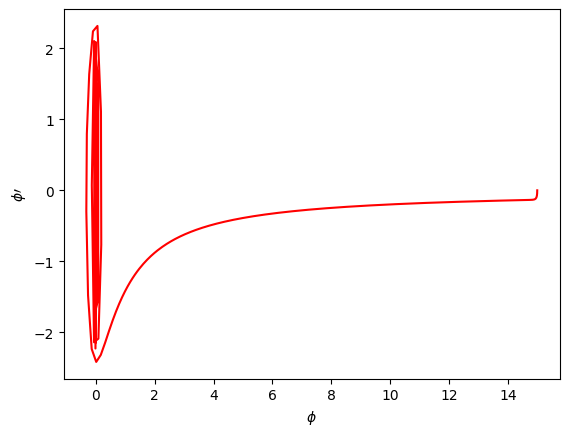

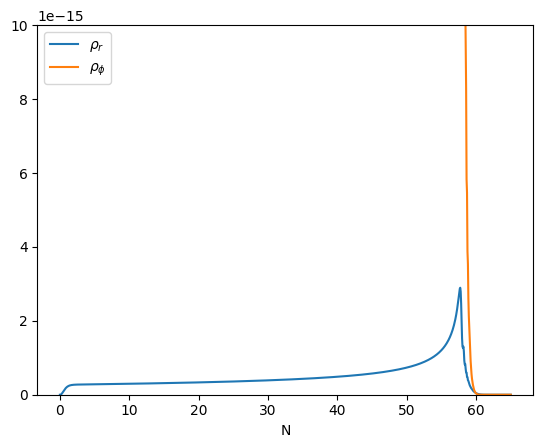

In [55]:
plt.plot(phi, phi_N, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi\prime $')
plt.show()
plt.plot(N, rho_r, label=r'$\rho_r$')
plt.plot(N, rho_phi, label=r'$\rho_\phi$')
plt.legend()
plt.xlabel('N')
plt.ylim(0,1e-14)
plt.show()

# System of $\phi$ (inflaton) plus Radiation and Matter
$$\phi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma}{H})\phi'-\frac{V_\phi}{H^2}\,.$$
$$\rho'_\phi=-3H^2\phi'^2-H\Gamma\phi'^2$$
$$\rho'_\gamma=-4\rho_r+H\Gamma_\gamma\phi'^2$$
$$\rho'_m=-3\rho_m+H\Gamma_m\phi'^2$$
$$H'=-\frac{\rho+p}{2M^2_\rm P H}$$
where $$\rho+p=\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2$$

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
m_p=1
m = 1e-6*m_p
def Vp(phi):
    return 0.5*m**2*phi**2
def V_phi(phi):
    return m**2*phi
# defination above should be changed for different models

phi=15
Hi=(2*Vp(phi)/ 6)**0.5
rho_phii=Vp(phi)
rho_ri=0
rho_mi=0
phii=15
phi_Ni=0
Gamma=1e-8
Gamma_r=1e-8
Gamma_m=1e-10
def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,phi_N,rho_phi,rho_r,rho_m,H = var
    dphidN=phi_N
    dphi_NdN = -(3+Gamma/H-(4*rho_r/3+rho_m+H**2*phi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)
    drho_phidN=-3*phi_N**2*H**2-H*Gamma*phi_N**2
    drho_rdN = -4*rho_r+H*Gamma_r*phi_N**2
    drho_mdN = -3*rho_m+H*Gamma_m*phi_N**2
    dHdN=-1/H*(4*rho_r/3+rho_m+H**2*phi_N**2)/(2*m_p**2)
    return [dphidN,dphi_NdN,drho_phidN,drho_rdN,drho_mdN,dHdN]
N = np.linspace(0, 65, 1000)  # Time points where solution is needed
sol = solve_ivp(sys, [N[0], N[-1]], [phii, phi_Ni,rho_phii, rho_ri, rho_mi,Hi], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
N = sol.t
phi, phi_N, rho_phi,rho_r, rho_m,H = sol.y

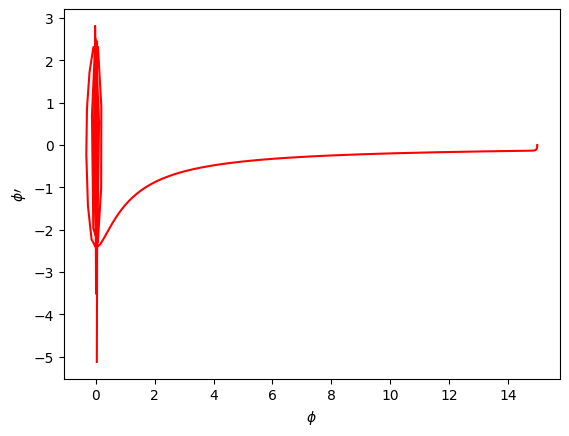

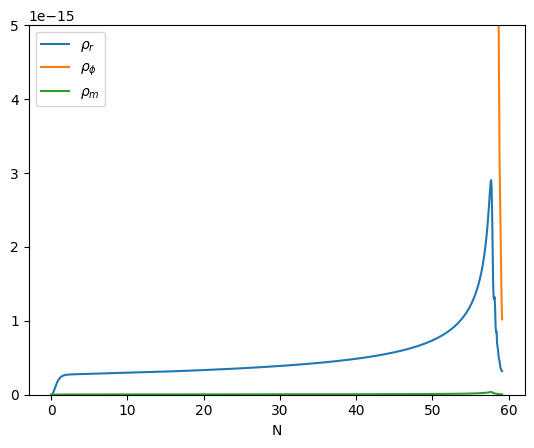

In [57]:
plt.plot(phi, phi_N, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\phi\prime $')
plt.show()
plt.plot(N, rho_r, label=r'$\rho_r$')
plt.plot(N, rho_phi, label=r'$\rho_\phi$')
plt.plot(N, rho_m, label=r'$\rho_m$')
plt.legend()
plt.xlabel('N')
plt.ylim(0,5e-15)
plt.show()

# System of $\phi$ $\chi$ (inflaton) plus Radiation and Matter
$$\phi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma_\phi}{H})\phi'-\frac{V_\phi}{H^2}+b_\phi e^{2b}\chi'^2\,.$$
$$\chi''=-(3-\frac{\rho+p}{2M^2_\rm P H^2}+\frac{\Gamma_\chi}{H}+2b_\phi \phi')\chi'-e^{-2b}\frac{V_\chi}{H^2}\,.$$
$$\rho'_\phi=-3H^2\phi'^2-H\Gamma_\phi\phi'^2$$
$$\rho'_\chi=-3H^2\chi'^2-H\Gamma_\chi\chi'^2$$
$$\rho'_r=-4\rho_r+H\Gamma_r\phi'^2$$
$$\rho'_m=-3\rho_m+H\Gamma_m\phi'^2$$
$$H'=-\frac{\rho+p}{2M^2_\rm P H}=\frac{1}{2M_\rm P ^2H}(\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2)$$
where $$\rho+p=\frac{4}{3}\rho_r+\rho_m+H^2\phi'^2+H^2e^{2b}\chi'^2$$

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

m_p=1#plank mass
mphi=1e-6*m_p
mchi=15*mphi
def e2b(phi):
    return 1
def em2b(phi):
    return 1/e2b(phi)
def b_phi(phi):
    return 0
def V_phi(phi):
    return mphi**2*phi/m_p**2
def V_chi(chi):
    return mchi**2*chi/m_p**2
def Vp(phi,chi):
    return (mchi**2*chi**2+mphi**2*phi**2)/(2*m_p**4)

# defination above should be changed for different models

phi=10
chi=10
Hi=(2*Vp(phi,chi)/ 6)**0.5

rho_phii=mphi**2*phi**2/(2*m_p**4)
rho_chii=mchi**2*chi**2/(2*m_p**4)
rho_ri=0
rho_mi=0
phii=10
chii=10
phi_Ni=0
chi_Ni=0

Gamma_chi=1e-8
Gamma_phi=1e-8
Gamma_r=1e-8
Gamma_m=1e-10

def sys(t, var):#here, t actully is N, to avoid naming trouble later, we will briefly use t here.
    phi,chi,phi_N,chi_N,rho_phi,rho_chi,rho_r,rho_m,H = var
    dphidN=phi_N
    dchidN=chi_N
    dphi_NdN = -(3+Gamma_phi/H-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*phi_N-V_phi(phi)/(H**2)+b_phi(phi)*e2b(phi)*chi_N**2
    dchi_NdN = -(3+Gamma_chi/H+2*b_phi(phi)*phi_N-(4*rho_r/3+rho_m+H**2*phi_N**2+H**2*e2b(phi)*chi_N**2)/(2*m_p**2*H**2))*chi_N-V_chi(chi)/(H**2)
    drho_phidN=-3*phi_N**2*H**2-H*Gamma_phi*phi_N**2
    drho_chidN=-3*chi_N**2*H**2-H*Gamma_chi*chi_N**2
    drho_rdN = -4*rho_r+H*Gamma_r*phi_N**2
    drho_mdN = -3*rho_m+H*Gamma_m*phi_N**2
    dHdN=-1/H*(4*rho_r/3+rho_m+H**2*phi_N**2++H**2*e2b(phi)*chi_N**2)/(2*m_p**2)
    return [dphidN,dchidN,dphi_NdN,dchi_NdN,drho_phidN,drho_chidN,drho_rdN,drho_mdN,dHdN]
N = np.linspace(0, 65, 1000)  # Time points where solution is needed
sol = solve_ivp(sys, [N[0], N[-1]], [phii,chii, phi_Ni,chi_Ni,rho_phii,rho_chii, rho_ri, rho_mi,Hi], t_eval=N, rtol=1e-8, atol=1e-10, method='RK45')
t = sol.t
phi,chi, phi_N,chi_N, rho_phi,rho_chi,rho_r, rho_m,H = sol.y

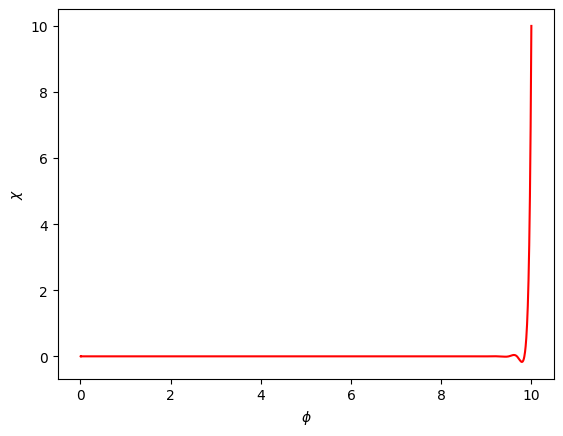

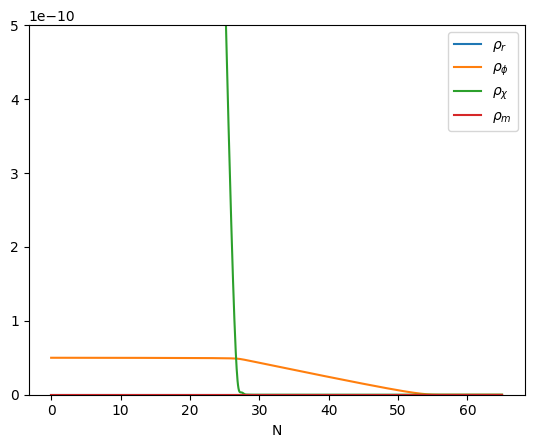

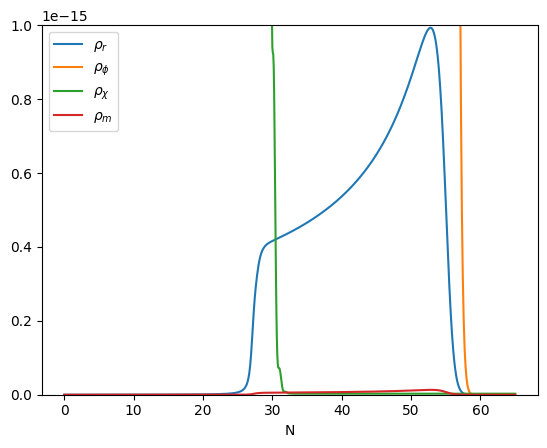

In [59]:
plt.plot(phi, chi, 'r')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\chi$')
plt.show()
plt.plot(t, rho_r, label=r'$\rho_r$')
plt.plot(t, rho_phi, label=r'$\rho_\phi$')
plt.plot(t, rho_chi, label=r'$\rho_\chi$')
plt.plot(t, rho_m, label=r'$\rho_m$')
plt.legend()
plt.xlabel('N')
plt.ylim(0,5e-10)
plt.show()
plt.plot(t, rho_r, label=r'$\rho_r$')
plt.plot(t, rho_phi, label=r'$\rho_\phi$')
plt.plot(t, rho_chi, label=r'$\rho_\chi$')
plt.plot(t, rho_m, label=r'$\rho_m$')
plt.legend()
plt.xlabel('N')
plt.ylim(0,1e-15)
plt.show()